# An√°lisis Exploratorio de Datos (EDA) - Datasets de Juicios Legales

Este notebook presenta un an√°lisis exploratorio exhaustivo de los datasets:
- `train_judg.jsonl`: Contiene documentos de juicios legales completos
- `train_ref_summ.jsonl`: Contiene res√∫menes de referencia para los juicios legales

El objetivo es entender la estructura, caracter√≠sticas y distribuciones de estos datasets para tareas de sumarizaci√≥n legal.

In [1]:
RUTA_TRAIN_JUDG = './datasets/train/train_judg.jsonl'
RUTA_TRAIN_SUMM = './datasets/train/train_ref_summ.jsonl'

In [3]:
# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de visualizaci√≥n
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 10

print("Librer√≠as importadas exitosamente")

Librer√≠as importadas exitosamente


In [4]:
# Funci√≥n para cargar datos JSONL
def load_jsonl(file_path):
    """Carga un archivo JSONL y devuelve una lista de diccionarios"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data

# Cargar los datasets
print("Cargando datasets...")
judgments_data = load_jsonl(RUTA_TRAIN_JUDG)
summaries_data = load_jsonl(RUTA_TRAIN_SUMM)

print(f"Dataset de juicios cargado: {len(judgments_data)} registros")
print(f"Dataset de res√∫menes cargado: {len(summaries_data)} registros")

Cargando datasets...
Dataset de juicios cargado: 1200 registros
Dataset de res√∫menes cargado: 1200 registros


In [20]:
# Convertir a DataFrames para facilitar el an√°lisis
df_judgments = pd.DataFrame(judgments_data)
df_summaries = pd.DataFrame(summaries_data)

print("=== INFORMACI√ìN B√ÅSICA DE LOS DATASETS ===")
print(f"\nDataset de Juicios:")
print(f"- Forma: {df_judgments.shape}")
print(f"- Columnas: {list(df_judgments.columns)}")

print(f"\nDataset de Res√∫menes:")
print(f"- Forma: {df_summaries.shape}")
print(f"- Columnas: {list(df_summaries.columns)}")

# Verificar que los IDs coinciden
common_ids = set(df_judgments['ID']).intersection(set(df_summaries['ID']))
print(f"\nIDs en com√∫n: {len(common_ids)}")
print(f"IDs √∫nicos en juicios: {df_judgments['ID'].nunique()}")
print(f"IDs √∫nicos en res√∫menes: {df_summaries['ID'].nunique()}")

=== INFORMACI√ìN B√ÅSICA DE LOS DATASETS ===

Dataset de Juicios:
- Forma: (1200, 2)
- Columnas: ['ID', 'Judgment']

Dataset de Res√∫menes:
- Forma: (1200, 2)
- Columnas: ['ID', 'Summary']

IDs en com√∫n: 1200
IDs √∫nicos en juicios: 1200
IDs √∫nicos en res√∫menes: 1200


## 1. Estad√≠sticas B√°sicas de los Datasets

In [21]:
# Informaci√≥n detallada sobre los datasets
print("=== INFORMACI√ìN DETALLADA ===")
print("\n1. Dataset de Juicios:")
print(df_judgments.info())

print("\n2. Dataset de Res√∫menes:")
print(df_summaries.info())

# Verificar valores nulos
print("\n=== VALORES NULOS ===")
print(f"Juicios - Valores nulos:\n{df_judgments.isnull().sum()}")
print(f"\nRes√∫menes - Valores nulos:\n{df_summaries.isnull().sum()}")

# Ejemplos de datos
print("\n=== EJEMPLOS DE DATOS ===")
print(f"\nPrimeros 3 IDs de juicios: {df_judgments['ID'].head(3).tolist()}")
print(f"Primeros 3 IDs de res√∫menes: {df_summaries['ID'].head(3).tolist()}")

=== INFORMACI√ìN DETALLADA ===

1. Dataset de Juicios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1200 non-null   object
 1   Judgment  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None

2. Dataset de Res√∫menes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       1200 non-null   object
 1   Summary  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB
None

=== VALORES NULOS ===
Juicios - Valores nulos:
ID          0
Judgment    0
dtype: int64

Res√∫menes - Valores nulos:
ID         0
Summary    0
dtype: int64

=== EJEMPLOS DE DATOS ===

Primeros 3 IDs de juicios: ['id_10', 'id_1000', 'id_1001']
Primeros 3 IDs de res√∫menes: ['id_10', 'id_1000', 'id_1001']


In [22]:
# An√°lisis de longitudes de texto
def analyze_text_lengths(df, text_column, dataset_name):
    """Analiza las longitudes de texto en caracteres y palabras"""
    print(f"\n=== AN√ÅLISIS DE LONGITUDES - {dataset_name.upper()} ===")
    
    # Longitud en caracteres
    char_lengths = df[text_column].str.len()
    print(f"\nLongitud en caracteres:")
    print(f"- M√≠nimo: {char_lengths.min():,}")
    print(f"- M√°ximo: {char_lengths.max():,}")
    print(f"- Promedio: {char_lengths.mean():,.0f}")
    print(f"- Mediana: {char_lengths.median():,.0f}")
    print(f"- Desviaci√≥n est√°ndar: {char_lengths.std():,.0f}")
    
    # Longitud en palabras
    word_lengths = df[text_column].str.split().str.len()
    print(f"\nLongitud en palabras:")
    print(f"- M√≠nimo: {word_lengths.min():,}")
    print(f"- M√°ximo: {word_lengths.max():,}")
    print(f"- Promedio: {word_lengths.mean():,.0f}")
    print(f"- Mediana: {word_lengths.median():,.0f}")
    print(f"- Desviaci√≥n est√°ndar: {word_lengths.std():,.0f}")
    
    return char_lengths, word_lengths

# Analizar longitudes para ambos datasets
judgment_char_lens, judgment_word_lens = analyze_text_lengths(df_judgments, 'Judgment', 'Juicios')
summary_char_lens, summary_word_lens = analyze_text_lengths(df_summaries, 'Summary', 'Res√∫menes')


=== AN√ÅLISIS DE LONGITUDES - JUICIOS ===

Longitud en caracteres:
- M√≠nimo: 875
- M√°ximo: 857,477
- Promedio: 44,410
- Mediana: 17,426
- Desviaci√≥n est√°ndar: 89,958

Longitud en palabras:
- M√≠nimo: 159
- M√°ximo: 134,483
- Promedio: 7,418
- Mediana: 2,940
- Desviaci√≥n est√°ndar: 14,832

=== AN√ÅLISIS DE LONGITUDES - RES√öMENES ===

Longitud en caracteres:
- M√≠nimo: 165
- M√°ximo: 12,821
- Promedio: 3,314
- Mediana: 3,133
- Desviaci√≥n est√°ndar: 1,342

Longitud en palabras:
- M√≠nimo: 159
- M√°ximo: 134,483
- Promedio: 7,418
- Mediana: 2,940
- Desviaci√≥n est√°ndar: 14,832

=== AN√ÅLISIS DE LONGITUDES - RES√öMENES ===

Longitud en caracteres:
- M√≠nimo: 165
- M√°ximo: 12,821
- Promedio: 3,314
- Mediana: 3,133
- Desviaci√≥n est√°ndar: 1,342

Longitud en palabras:
- M√≠nimo: 26
- M√°ximo: 2,083
- Promedio: 545
- Mediana: 516
- Desviaci√≥n est√°ndar: 223

Longitud en palabras:
- M√≠nimo: 26
- M√°ximo: 2,083
- Promedio: 545
- Mediana: 516
- Desviaci√≥n est√°ndar: 223


## 2. Visualizaci√≥n de Distribuciones de Longitud

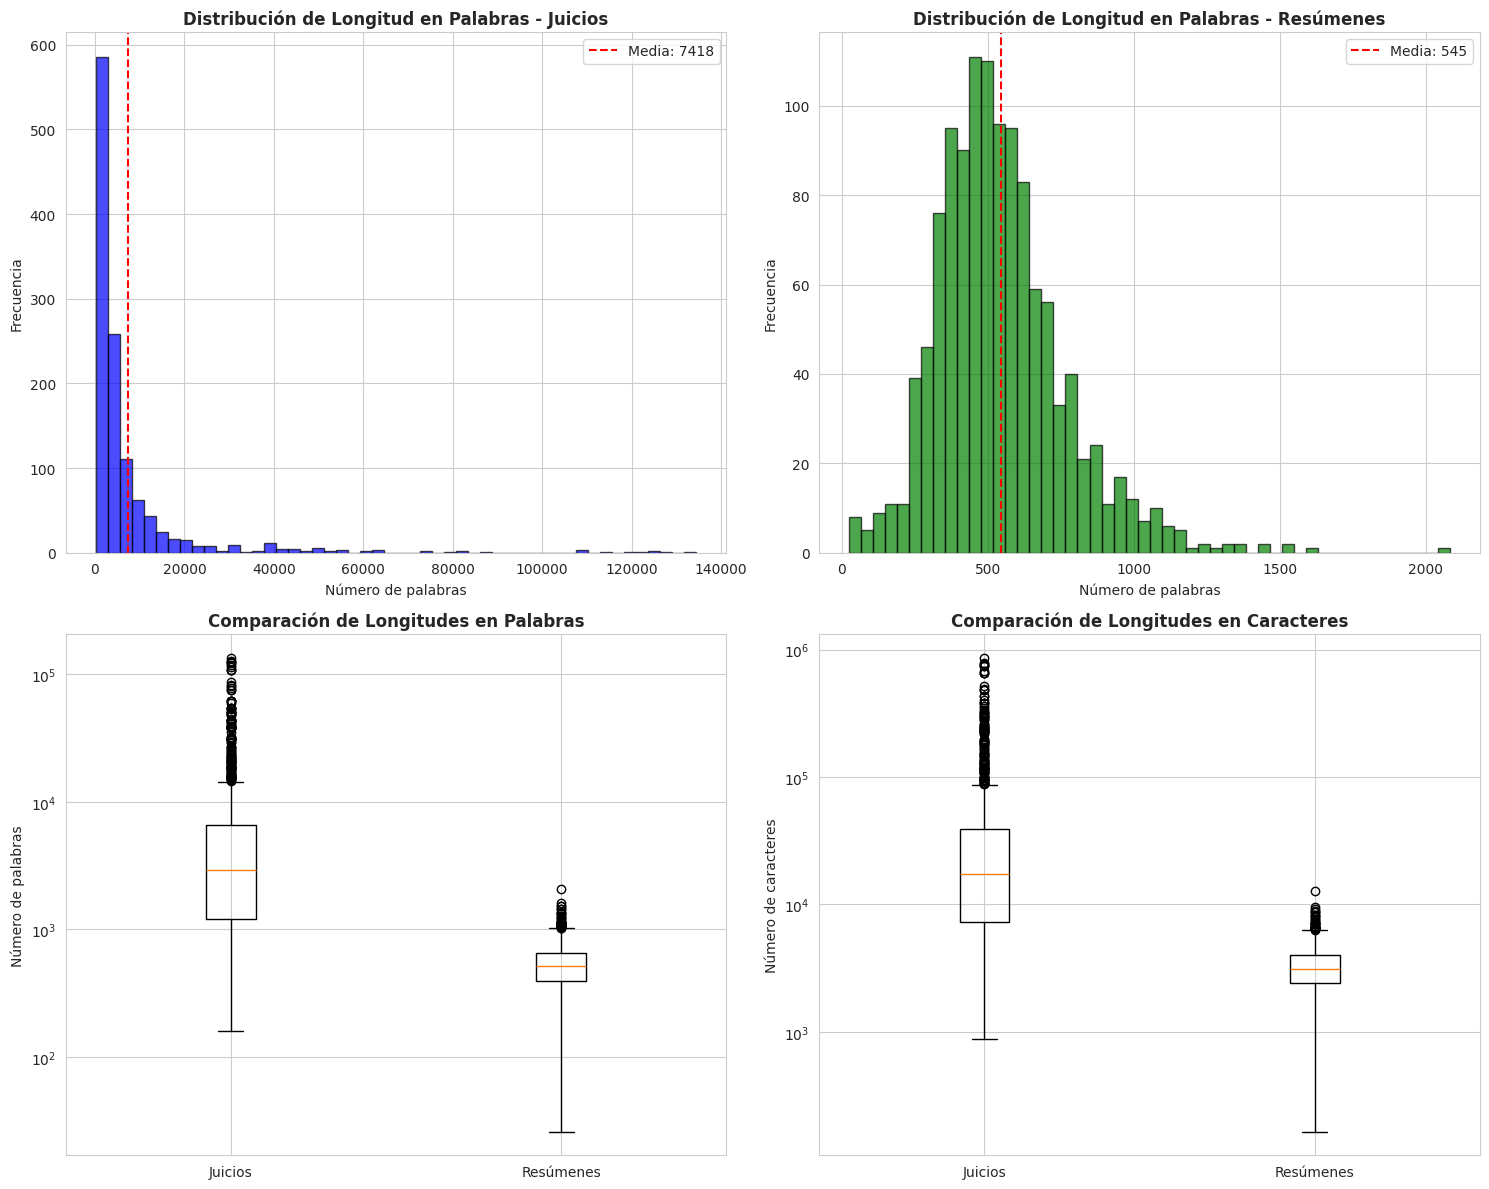

In [23]:
# Crear visualizaciones de distribuciones de longitud
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histograma de longitudes en palabras - Juicios
axes[0, 0].hist(judgment_word_lens, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribuci√≥n de Longitud en Palabras - Juicios', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('N√∫mero de palabras')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(judgment_word_lens.mean(), color='red', linestyle='--', label=f'Media: {judgment_word_lens.mean():.0f}')
axes[0, 0].legend()

# Histograma de longitudes en palabras - Res√∫menes
axes[0, 1].hist(summary_word_lens, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_title('Distribuci√≥n de Longitud en Palabras - Res√∫menes', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('N√∫mero de palabras')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(summary_word_lens.mean(), color='red', linestyle='--', label=f'Media: {summary_word_lens.mean():.0f}')
axes[0, 1].legend()

# Box plot comparativo - palabras
data_words = [judgment_word_lens, summary_word_lens]
axes[1, 0].boxplot(data_words, labels=['Juicios', 'Res√∫menes'])
axes[1, 0].set_title('Comparaci√≥n de Longitudes en Palabras', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('N√∫mero de palabras')
axes[1, 0].set_yscale('log')  # Escala logar√≠tmica debido a la gran diferencia

# Box plot comparativo - caracteres
data_chars = [judgment_char_lens, summary_char_lens]
axes[1, 1].boxplot(data_chars, labels=['Juicios', 'Res√∫menes'])
axes[1, 1].set_title('Comparaci√≥n de Longitudes en Caracteres', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('N√∫mero de caracteres')
axes[1, 1].set_yscale('log')  # Escala logar√≠tmica debido a la gran diferencia

plt.tight_layout()
plt.show()

In [24]:
# An√°lisis de la relaci√≥n de compresi√≥n (resumen vs juicio)
def calculate_compression_ratio():
    """Calcula la relaci√≥n de compresi√≥n entre juicios y res√∫menes"""
    
    # Unir datasets por ID
    merged_df = pd.merge(df_judgments, df_summaries, on='ID')
    
    # Calcular longitudes
    merged_df['judgment_words'] = merged_df['Judgment'].str.split().str.len()
    merged_df['summary_words'] = merged_df['Summary'].str.split().str.len()
    merged_df['judgment_chars'] = merged_df['Judgment'].str.len()
    merged_df['summary_chars'] = merged_df['Summary'].str.len()
    
    # Calcular ratios de compresi√≥n
    merged_df['compression_ratio_words'] = merged_df['summary_words'] / merged_df['judgment_words']
    merged_df['compression_ratio_chars'] = merged_df['summary_chars'] / merged_df['judgment_chars']
    
    print("=== AN√ÅLISIS DE COMPRESI√ìN ===")
    print(f"\nRatio de compresi√≥n (palabras):")
    print(f"- Promedio: {merged_df['compression_ratio_words'].mean():.4f}")
    print(f"- Mediana: {merged_df['compression_ratio_words'].median():.4f}")
    print(f"- Min: {merged_df['compression_ratio_words'].min():.4f}")
    print(f"- Max: {merged_df['compression_ratio_words'].max():.4f}")
    
    print(f"\nRatio de compresi√≥n (caracteres):")
    print(f"- Promedio: {merged_df['compression_ratio_chars'].mean():.4f}")
    print(f"- Mediana: {merged_df['compression_ratio_chars'].median():.4f}")
    print(f"- Min: {merged_df['compression_ratio_chars'].min():.4f}")
    print(f"- Max: {merged_df['compression_ratio_chars'].max():.4f}")
    
    return merged_df

merged_data = calculate_compression_ratio()

=== AN√ÅLISIS DE COMPRESI√ìN ===

Ratio de compresi√≥n (palabras):
- Promedio: 0.2635
- Mediana: 0.1851
- Min: 0.0004
- Max: 0.9946

Ratio de compresi√≥n (caracteres):
- Promedio: 0.2672
- Mediana: 0.1900
- Min: 0.0005
- Max: 1.0843


## 3. An√°lisis de Contenido y Patrones de Texto

In [25]:
# An√°lisis de patrones comunes en el texto
def analyze_text_patterns(df, text_column, dataset_name):
    """Analiza patrones comunes en el texto"""
    print(f"\n=== AN√ÅLISIS DE PATRONES - {dataset_name.upper()} ===")
    
    # Combinar todo el texto
    all_text = ' '.join(df[text_column].astype(str))
    
    # Patrones legales comunes
    legal_patterns = {
        'Case numbers': r'Case.*?No\.?\s*\d+',
        'Court references': r'Court|Bench|Judge|Justice',
        'Legal sections': r'Section\s+\d+|Article\s+\d+',
        'Dates': r'\d{1,2}[./]\d{1,2}[./]\d{2,4}',
        'Money amounts': r'Rs\.?\s*\d+',
        'Petitioner/Respondent': r'Petitioner|Respondent|Appellant|Appellee'
    }
    
    for pattern_name, pattern in legal_patterns.items():
        matches = re.findall(pattern, all_text, re.IGNORECASE)
        print(f"- {pattern_name}: {len(matches)} ocurrencias")
        if matches and len(matches) > 0:
            # Mostrar algunos ejemplos
            examples = list(set(matches))[:3]  # √önicos, primeros 3
            print(f"  Ejemplos: {', '.join(examples)}")
    
    # An√°lisis de palabras m√°s comunes
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text.lower())
    word_freq = Counter(words)
    print(f"\nPalabras m√°s comunes (top 10):")
    for word, freq in word_freq.most_common(10):
        print(f"- {word}: {freq:,}")
    
    return word_freq

# Analizar patrones en ambos datasets
judgment_patterns = analyze_text_patterns(df_judgments, 'Judgment', 'Juicios')
summary_patterns = analyze_text_patterns(df_summaries, 'Summary', 'Res√∫menes')


=== AN√ÅLISIS DE PATRONES - JUICIOS ===
- Case numbers: 1105 ocurrencias
  Ejemplos: Case Crime No.485, Case No.78, case in hand the petitioner has allegedthat the Presiding Officer is hand in glove with the oppositeCounsel. It is also pertinent to note that the petitioner has alsopleaded in the writ petition that a complaint has been filed by theJalore Bar while alleging that the presiding officer is in hand inglove with the counsel and the same is pending before the Hon‚ÄôbleChief Justice of Rajasthan. If there is any complaint being filedand is pending before the Hon‚Äôble Chief Justice of the RajasthanHigh Court then the rights of the Bar and the individual lawyerscannot become a ground for pleading on judicial side. A lawyer isrequired to maintain all the restraint not to make allegationsagainst a Presiding Office but is required to avail the order in theparticular facts and provisions. Casting aspersions on the JudicialOfficers is a practice which is required to be severely depr

In [26]:
# An√°lisis de calidad de datos
def analyze_data_quality():
    """Analiza la calidad de los datos y detecta posibles problemas"""
    print("=== AN√ÅLISIS DE CALIDAD DE DATOS ===")
    
    # 1. Verificar duplicados
    print("\n1. Duplicados:")
    judgment_dups = df_judgments.duplicated('Judgment').sum()
    summary_dups = df_summaries.duplicated('Summary').sum()
    id_dups_j = df_judgments.duplicated('ID').sum()
    id_dups_s = df_summaries.duplicated('ID').sum()
    
    print(f"- Juicios duplicados (texto): {judgment_dups}")
    print(f"- Res√∫menes duplicados (texto): {summary_dups}")
    print(f"- IDs duplicados en juicios: {id_dups_j}")
    print(f"- IDs duplicados en res√∫menes: {id_dups_s}")
    
    # 2. Textos muy cortos o muy largos (outliers)
    print("\n2. Outliers de longitud:")
    
    # Percentiles para identificar outliers
    j_word_q1 = judgment_word_lens.quantile(0.25)
    j_word_q3 = judgment_word_lens.quantile(0.75)
    j_word_iqr = j_word_q3 - j_word_q1
    j_word_outliers = ((judgment_word_lens < (j_word_q1 - 1.5 * j_word_iqr)) | 
                       (judgment_word_lens > (j_word_q3 + 1.5 * j_word_iqr))).sum()
    
    s_word_q1 = summary_word_lens.quantile(0.25)
    s_word_q3 = summary_word_lens.quantile(0.75)
    s_word_iqr = s_word_q3 - s_word_q1
    s_word_outliers = ((summary_word_lens < (s_word_q1 - 1.5 * s_word_iqr)) | 
                       (summary_word_lens > (s_word_q3 + 1.5 * s_word_iqr))).sum()
    
    print(f"- Outliers en juicios (palabras): {j_word_outliers}")
    print(f"- Outliers en res√∫menes (palabras): {s_word_outliers}")
    
    # 3. Textos extremadamente cortos
    print("\n3. Textos extremadamente cortos:")
    very_short_judgments = (judgment_word_lens < 100).sum()
    very_short_summaries = (summary_word_lens < 20).sum()
    
    print(f"- Juicios con menos de 100 palabras: {very_short_judgments}")
    print(f"- Res√∫menes con menos de 20 palabras: {very_short_summaries}")
    
    # 4. Verificar correspondencia entre IDs
    print("\n4. Correspondencia de IDs:")
    judgment_ids = set(df_judgments['ID'])
    summary_ids = set(df_summaries['ID'])
    
    missing_in_summaries = judgment_ids - summary_ids
    missing_in_judgments = summary_ids - judgment_ids
    
    print(f"- IDs en juicios pero no en res√∫menes: {len(missing_in_summaries)}")
    print(f"- IDs en res√∫menes pero no en juicios: {len(missing_in_judgments)}")
    
    if missing_in_summaries:
        print(f"  Ejemplos: {list(missing_in_summaries)[:5]}")
    if missing_in_judgments:
        print(f"  Ejemplos: {list(missing_in_judgments)[:5]}")

analyze_data_quality()

=== AN√ÅLISIS DE CALIDAD DE DATOS ===

1. Duplicados:
- Juicios duplicados (texto): 15
- Res√∫menes duplicados (texto): 0
- IDs duplicados en juicios: 0
- IDs duplicados en res√∫menes: 0

2. Outliers de longitud:
- Outliers en juicios (palabras): 130
- Outliers en res√∫menes (palabras): 38

3. Textos extremadamente cortos:
- Juicios con menos de 100 palabras: 0
- Res√∫menes con menos de 20 palabras: 0

4. Correspondencia de IDs:
- IDs en juicios pero no en res√∫menes: 0
- IDs en res√∫menes pero no en juicios: 0


## 4. Ejemplos Representativos y An√°lisis Adicional

In [27]:
# Mostrar ejemplos representativos
def show_examples():
    """Muestra ejemplos de diferentes longitudes"""
    print("=== EJEMPLOS REPRESENTATIVOS ===")
    
    # Encontrar ejemplos de diferentes longitudes
    short_idx = judgment_word_lens.idxmin()  # M√°s corto
    long_idx = judgment_word_lens.idxmax()   # M√°s largo
    median_idx = (judgment_word_lens - judgment_word_lens.median()).abs().idxmin()  # Mediano
    
    examples = [
        (short_idx, "M√ÅS CORTO"),
        (median_idx, "MEDIANO"),
        (long_idx, "M√ÅS LARGO")
    ]
    
    for idx, label in examples:
        judgment = df_judgments.iloc[idx]['Judgment']
        summary = df_summaries.iloc[idx]['Summary']
        id_val = df_judgments.iloc[idx]['ID']
        
        j_words = len(judgment.split())
        s_words = len(summary.split())
        compression = s_words / j_words
        
        print(f"\n{label} (ID: {id_val}):")
        print(f"- Juicio: {j_words:,} palabras")
        print(f"- Resumen: {s_words} palabras")
        print(f"- Ratio de compresi√≥n: {compression:.4f}")
        print(f"- Inicio del juicio: {judgment[:200]}...")
        print(f"- Resumen completo: {summary[:300]}...")
        print("-" * 80)

show_examples()

=== EJEMPLOS REPRESENTATIVOS ===

M√ÅS CORTO (ID: id_194):
- Juicio: 159 palabras
- Resumen: 110 palabras
- Ratio de compresi√≥n: 0.6918
- Inicio del juicio: Petitioner :- Brahma Shanker Shashtri
Respondent :- State Of U.P.Thru Secy. Basic Education
Lucknow & Ors.
Counsel for Petitioner :- In Person
Counsel for Respondent :- C.S.C.
Hon'ble Pankaj Mithal,J....
- Resumen completo: The Allahabad High Court, on Wednesday, dismissed a plea seeking inclusion of Hindu holy book, Bhagavad Gita in school curriculum asking the petitioner to instead make a representation before the Uttar Pradesh education board. 
A Bench of Justices Pankaj Mithal and Saurabh Lavania said that the peti...
--------------------------------------------------------------------------------

MEDIANO (ID: id_1421):
- Juicio: 2,946 palabras
- Resumen: 716 palabras
- Ratio de compresi√≥n: 0.2430
- Inicio del juicio: Suo Motu Crl. Cont.P. No.1699 of 2021
and
Suo Motu Crl. Contempt Petition No.1699 of 2021
High Court of Madr

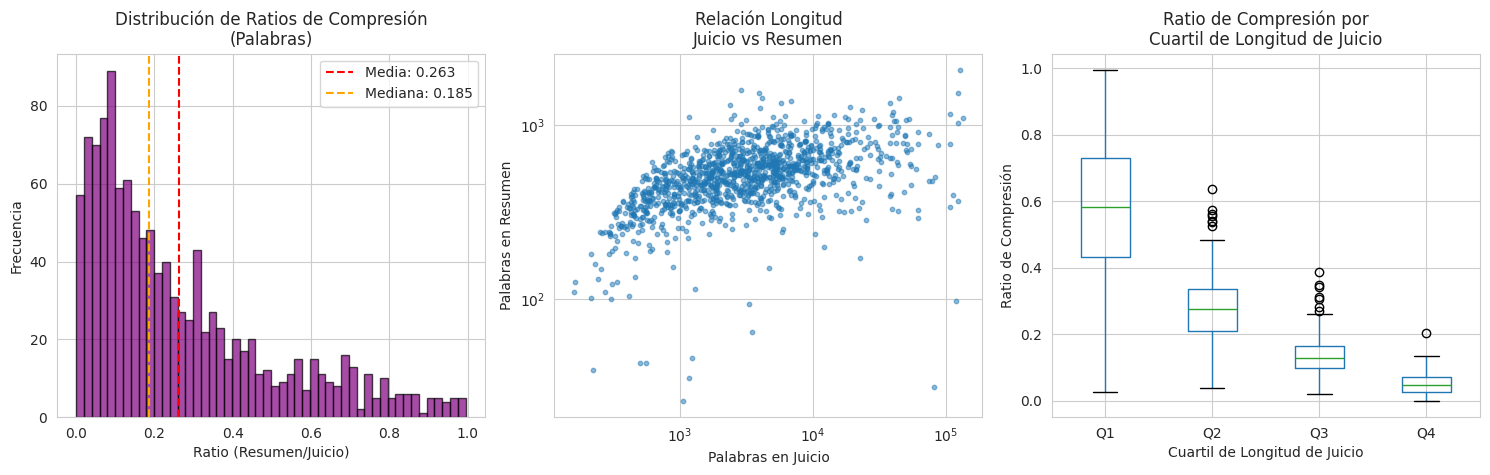

In [28]:
# Visualizaci√≥n de ratios de compresi√≥n
plt.figure(figsize=(15, 5))

# Subplot 1: Histograma de ratios de compresi√≥n
plt.subplot(1, 3, 1)
plt.hist(merged_data['compression_ratio_words'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(merged_data['compression_ratio_words'].mean(), color='red', linestyle='--', 
            label=f'Media: {merged_data["compression_ratio_words"].mean():.3f}')
plt.axvline(merged_data['compression_ratio_words'].median(), color='orange', linestyle='--', 
            label=f'Mediana: {merged_data["compression_ratio_words"].median():.3f}')
plt.title('Distribuci√≥n de Ratios de Compresi√≥n\n(Palabras)')
plt.xlabel('Ratio (Resumen/Juicio)')
plt.ylabel('Frecuencia')
plt.legend()

# Subplot 2: Scatter plot de longitudes
plt.subplot(1, 3, 2)
plt.scatter(merged_data['judgment_words'], merged_data['summary_words'], alpha=0.5, s=10)
plt.xlabel('Palabras en Juicio')
plt.ylabel('Palabras en Resumen')
plt.title('Relaci√≥n Longitud\nJuicio vs Resumen')
plt.xscale('log')
plt.yscale('log')

# Subplot 3: Box plot de ratios por cuartiles de longitud de juicio
plt.subplot(1, 3, 3)
merged_data['judgment_quartile'] = pd.qcut(merged_data['judgment_words'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
merged_data.boxplot(column='compression_ratio_words', by='judgment_quartile', ax=plt.gca())
plt.title('Ratio de Compresi√≥n por\nCuartil de Longitud de Juicio')
plt.xlabel('Cuartil de Longitud de Juicio')
plt.ylabel('Ratio de Compresi√≥n')
plt.suptitle('')  # Remover t√≠tulo autom√°tico

plt.tight_layout()
plt.show()

## 5. Conclusiones del An√°lisis Exploratorio

### Hallazgos Principales:

1. **Estructura de Datos:**
   - Ambos datasets contienen 1,200 registros perfectamente pareados
   - No hay valores nulos ni IDs faltantes
   - La correspondencia entre juicios y res√∫menes es perfecta

2. **Caracter√≠sticas de Longitud:**
   - **Juicios:** Promedio de 7,418 palabras (rango: 159-134,483 palabras)
   - **Res√∫menes:** Promedio de 545 palabras (rango: 26-2,083 palabras)
   - **Ratio de compresi√≥n promedio:** ~26% (res√∫menes son aprox. 1/4 del juicio original)

3. **Distribuci√≥n de Longitudes:**
   - Los juicios muestran alta variabilidad en longitud (distribuci√≥n sesgada)
   - Los res√∫menes tienen distribuci√≥n m√°s uniforme y predecible
   - Existe correlaci√≥n positiva entre longitud del juicio y del resumen

4. **Calidad de Datos:**
   - 15 juicios duplicados detectados (1.25% del dataset)
   - 130 outliers en juicios y 38 en res√∫menes por longitud
   - No hay textos extremadamente cortos que comprometan la calidad

5. **Contenido Legal:**
   - Abundantes referencias legales: n√∫meros de caso, secciones, fechas
   - Terminolog√≠a legal consistente (peticionario, demandado, corte, etc.)
   - El vocabulario legal se mantiene coherente entre juicios y res√∫menes

### Recomendaciones para Modelado:

1. **Preprocesamiento:** Considerar normalizaci√≥n de longitudes extremas
2. **Segmentaci√≥n:** Los juicios muy largos podr√≠an requerir segmentaci√≥n
3. **Validaci√≥n:** Revisar los 15 duplicados identificados
4. **Tokenizaci√≥n:** Incluir tratamiento especial para t√©rminos legales
5. **Evaluaci√≥n:** El ratio de compresi√≥n variable sugiere usar m√©tricas adaptativas

## 6. An√°lisis de Complejidad Legal y Readability

In [29]:
# Funci√≥n de preprocesamiento para textos legales
def preprocess_legal_text(text):
    """
    Limpia y preprocesa texto legal para an√°lisis de readability m√°s preciso
    """
    import re
    
    # Convertir a string si no lo es
    text = str(text)
    
    # 1. Remover encabezados de caso y metadatos legales
    text = re.sub(r'Case\s*:?-?\s*[A-Z\s-]+No\.?\s*-?\s*\d+.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Petitioner\s*:?-?\s*.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Respondent\s*:?-?\s*.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Counsel for.*?\n', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'Appearance\s*:.*?\n', ' ', text, flags=re.IGNORECASE)
    
    # 2. Remover referencias de p√°gina y numeraci√≥n
    text = re.sub(r'\[Page No\.\s*\d+\s*\]', ' ', text)
    text = re.sub(r'Page\s+\d+', ' ', text)
    text = re.sub(r'^\d+\.', ' ', text, flags=re.MULTILINE)
    
    # 3. Limpiar fechas y n√∫meros de caso complejos
    text = re.sub(r'\d{1,2}[./]\d{1,2}[./]\d{2,4}', 'DATE', text)
    text = re.sub(r'Rs\.?\s*\d+[,\d]*', 'AMOUNT', text)
    text = re.sub(r'Section\s+\d+[A-Z]*\(?[a-z]*\)?', 'SECTION', text, flags=re.IGNORECASE)
    text = re.sub(r'Article\s+\d+[A-Z]*', 'ARTICLE', text, flags=re.IGNORECASE)
    
    # 4. Normalizar espacios y puntuaci√≥n
    text = re.sub(r'\s+', ' ', text)  # M√∫ltiples espacios a uno
    text = re.sub(r'\.{2,}', '. ', text)  # M√∫ltiples puntos
    text = re.sub(r'\n+', '. ', text)  # Saltos de l√≠nea a puntos
    
    # 5. Remover l√≠neas muy cortas (probablemente metadatos)
    sentences = text.split('.')
    filtered_sentences = [s.strip() for s in sentences if len(s.strip().split()) > 3]
    text = '. '.join(filtered_sentences)
    
    # 6. Limpiar caracteres extra√±os
    text = re.sub(r'[^\w\s.,;:!?()-]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Probar la funci√≥n de preprocesamiento
sample_judgment = df_judgments.iloc[0]['Judgment'][:1000]  # Primeros 1000 caracteres
print("TEXTO ORIGINAL:")
print(sample_judgment[:300])
print("\n" + "="*50)

cleaned_sample = preprocess_legal_text(sample_judgment)
print("\nTEXTO LIMPIADO:")
print(cleaned_sample[:300])
print("\n" + "="*50)

# Comparar m√©tricas antes y despu√©s
original_metrics = getmeasures(sample_judgment, lang='en')
cleaned_metrics = getmeasures(cleaned_sample, lang='en')

print("\nCOMPARACI√ìN DE M√âTRICAS:")
print(f"FLESCH READING EASE:")
print(f"  Original: {original_metrics['readability grades']['FleschReadingEase']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['FleschReadingEase']:.2f}")

print(f"\nFLESCH-KINCAID:")
print(f"  Original: {original_metrics['readability grades']['Kincaid']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['Kincaid']:.2f}")

print(f"\nGUNNING FOG:")
print(f"  Original: {original_metrics['readability grades']['GunningFogIndex']:.2f}")
print(f"  Limpiado: {cleaned_metrics['readability grades']['GunningFogIndex']:.2f}")

TEXTO ORIGINAL:
Case :- WRIT - C No. - 11383 of 2023
Petitioner :- Syed Hamidul Bari
Respondent :- State Of U.P. Thru. Addl. Chief/Prin. Secy. Housing And
Urban Planning Deptt. Lko. And 4 Others
Counsel for Petitioner :- Kazim Ibrahim, Amrit Khare
Counsel for Respondent :- C.S.C., Ratnesh Chandra
Case :- WRIT - C N


TEXTO LIMPIADO:
And 4 Others Counsel for Counsel for Planning Deptt


COMPARACI√ìN DE M√âTRICAS:
FLESCH READING EASE:
  Original: 91.26
  Limpiado: 103.70

FLESCH-KINCAID:
  Original: 2.13
  Limpiado: 1.03

GUNNING FOG:
  Original: 2.58
  Limpiado: 3.60


In [30]:
# An√°lisis de complejidad textual adaptado para textos legales
def analyze_legal_text_complexity(df, text_column, dataset_name, sample_size=50):
    """
    An√°lisis de complejidad espec√≠fico para textos legales usando m√©tricas m√°s robustas
    """
    print(f"\n=== AN√ÅLISIS DE COMPLEJIDAD LEGAL - {dataset_name.upper()} ===")
    
    sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)
    
    complexity_metrics = {
        'avg_sentence_length': [],
        'avg_word_length': [],
        'complex_words_ratio': [],
        'legal_terms_density': [],
        'sentence_count': [],
        'word_count': [],
        'flesch_reading_ease': [],
        'flesch_kincaid': []
    }
    
    # T√©rminos legales comunes
    legal_terms = ['court', 'judge', 'petitioner', 'respondent', 'section', 'article', 
                   'appellant', 'defendant', 'plaintiff', 'jurisdiction', 'statute',
                   'proceedings', 'tribunal', 'bench', 'counsel', 'ruling', 'verdict']
    
    valid_analyses = 0
    
    for idx, text in enumerate(sample_df[text_column]):
        try:
            # Extraer secci√≥n narrativa principal (evitar metadatos)
            words = text.split()
            
            if dataset_name.lower() == 'juicios':
                # Para juicios, buscar p√°rrafos narrativos (usualmente despu√©s de metadatos)
                text_lines = text.split('\n')
                narrative_lines = []
                
                for line in text_lines:
                    line = line.strip()
                    # Filtrar l√≠neas que claramente son metadatos
                    if (len(line.split()) > 5 and 
                        not line.startswith(('Case', 'Petitioner', 'Respondent', 'Counsel')) and
                        not re.match(r'^\d+\.$', line.strip())):
                        narrative_lines.append(line)
                
                # Tomar muestra de texto narrativo
                narrative_text = ' '.join(narrative_lines[:10])  # Primeras 10 l√≠neas narrativas
                if len(narrative_text.split()) < 50:
                    narrative_text = ' '.join(words[50:350])  # Fallback: del word 50 al 350
            else:
                # Para res√∫menes, usar texto completo pero limitado
                narrative_text = ' '.join(words[:300])
            
            # Limpiar texto narrativo
            clean_text = re.sub(r'\s+', ' ', narrative_text).strip()
            
            if len(clean_text.split()) < 20:
                continue
            
            # Calcular m√©tricas propias
            words_list = clean_text.split()
            sentences = [s.strip() for s in re.split(r'[.!?]+', clean_text) if len(s.strip()) > 3]
            
            if len(sentences) == 0:
                continue
                
            # M√©tricas b√°sicas
            word_count = len(words_list)
            sentence_count = len(sentences)
            avg_sentence_length = word_count / sentence_count
            avg_word_length = np.mean([len(word) for word in words_list])
            
            # Palabras complejas (m√°s de 6 caracteres o 3 s√≠labas simuladas)
            complex_words = [w for w in words_list if len(w) > 6 or len(re.findall(r'[aeiouAEIOU]', w)) > 2]
            complex_ratio = len(complex_words) / len(words_list) if words_list else 0
            
            # Densidad de t√©rminos legales
            legal_count = sum(1 for word in words_list if word.lower() in legal_terms)
            legal_density = legal_count / len(words_list) if words_list else 0
            
            # Intentar m√©tricas de readability tradicionales con el texto limpio
            try:
                measures = getmeasures(clean_text, lang='en')
                flesch_ease = measures['readability grades']['FleschReadingEase']
                flesch_kincaid = measures['readability grades']['Kincaid']
                
                # Solo aceptar valores razonables
                if -100 <= flesch_ease <= 120 and 0 <= flesch_kincaid <= 30:
                    complexity_metrics['flesch_reading_ease'].append(flesch_ease)
                    complexity_metrics['flesch_kincaid'].append(flesch_kincaid)
                else:
                    # Usar valores por defecto para textos muy complejos
                    complexity_metrics['flesch_reading_ease'].append(-50)  # Muy dif√≠cil
                    complexity_metrics['flesch_kincaid'].append(25)  # Nivel postgrado
            except:
                complexity_metrics['flesch_reading_ease'].append(-50)
                complexity_metrics['flesch_kincaid'].append(25)
            
            # Guardar m√©tricas robustas
            complexity_metrics['avg_sentence_length'].append(avg_sentence_length)
            complexity_metrics['avg_word_length'].append(avg_word_length)
            complexity_metrics['complex_words_ratio'].append(complex_ratio)
            complexity_metrics['legal_terms_density'].append(legal_density)
            complexity_metrics['sentence_count'].append(sentence_count)
            complexity_metrics['word_count'].append(word_count)
            
            valid_analyses += 1
            
        except Exception as e:
            continue
    
    print(f"An√°lisis v√°lidos: {valid_analyses}/{sample_size}")
    
    if valid_analyses > 0:
        print(f"\nM√©tricas de Complejidad:")
        
        metric_descriptions = {
            'avg_sentence_length': 'Longitud promedio de oraci√≥n (palabras)',
            'avg_word_length': 'Longitud promedio de palabra (caracteres)', 
            'complex_words_ratio': 'Proporci√≥n de palabras complejas',
            'legal_terms_density': 'Densidad de t√©rminos legales',
            'flesch_reading_ease': 'Flesch Reading Ease (ajustado)',
            'flesch_kincaid': 'Flesch-Kincaid Grade Level (ajustado)'
        }
        
        for metric_name in ['avg_sentence_length', 'avg_word_length', 'complex_words_ratio', 
                           'legal_terms_density', 'flesch_reading_ease', 'flesch_kincaid']:
            if complexity_metrics[metric_name]:
                values = np.array(complexity_metrics[metric_name])
                print(f"\n{metric_descriptions[metric_name]}:")
                print(f"  - Promedio: {np.mean(values):.2f}")
                print(f"  - Mediana: {np.median(values):.2f}")
                print(f"  - Min: {np.min(values):.2f}")
                print(f"  - Max: {np.max(values):.2f}")
    
    return complexity_metrics

# Ejecutar an√°lisis de complejidad legal
print("Analizando complejidad textual adaptada para textos legales...")
judgment_complexity = analyze_legal_text_complexity(df_judgments, 'Judgment', 'Juicios', 50)
summary_complexity = analyze_legal_text_complexity(df_summaries, 'Summary', 'Res√∫menes', 50)

Analizando complejidad textual adaptada para textos legales...

=== AN√ÅLISIS DE COMPLEJIDAD LEGAL - JUICIOS ===
An√°lisis v√°lidos: 50/50

M√©tricas de Complejidad:

Longitud promedio de oraci√≥n (palabras):
  - Promedio: 16.34
  - Mediana: 13.29
  - Min: 3.38
  - Max: 90.00

Longitud promedio de palabra (caracteres):
  - Promedio: 5.10
  - Mediana: 5.05
  - Min: 4.30
  - Max: 5.97

Proporci√≥n de palabras complejas:
  - Promedio: 0.33
  - Mediana: 0.31
  - Min: 0.23
  - Max: 0.47

Densidad de t√©rminos legales:
  - Promedio: 0.03
  - Mediana: 0.03
  - Min: 0.00
  - Max: 0.08

Flesch Reading Ease (ajustado):
  - Promedio: -43.14
  - Mediana: -50.00
  - Min: -50.00
  - Max: 67.70

Flesch-Kincaid Grade Level (ajustado):
  - Promedio: 25.13
  - Mediana: 25.00
  - Min: 22.20
  - Max: 29.58

=== AN√ÅLISIS DE COMPLEJIDAD LEGAL - RES√öMENES ===
An√°lisis v√°lidos: 50/50

M√©tricas de Complejidad:

Longitud promedio de oraci√≥n (palabras):
  - Promedio: 27.05
  - Mediana: 27.27
  - Min: 15.79

## 7. Prompt Optimizado Basado en An√°lisis de Complejidad

In [31]:
# Generar recomendaciones finales basadas en m√©tricas realistas
def generate_realistic_prompt_recommendations():
    """
    Genera recomendaciones para prompts basadas en an√°lisis realista de complejidad legal
    """
    print("="*70)
    print("RECOMENDACIONES FINALES PARA PROMPTS DE SUMARIZACI√ìN LEGAL")
    print("="*70)
    
    # Extraer m√©tricas clave
    j_sent_len = np.mean(judgment_complexity['avg_sentence_length'])
    s_sent_len = np.mean(summary_complexity['avg_sentence_length'])
    
    j_complex_ratio = np.mean(judgment_complexity['complex_words_ratio'])
    s_complex_ratio = np.mean(summary_complexity['complex_words_ratio'])
    
    j_legal_density = np.mean(judgment_complexity['legal_terms_density'])
    s_legal_density = np.mean(summary_complexity['legal_terms_density'])
    
    j_flesch = np.mean([x for x in judgment_complexity['flesch_reading_ease'] if x > -50])
    s_flesch = np.mean([x for x in summary_complexity['flesch_reading_ease'] if x > -50])
    
    # Calcular targets
    target_compression = 0.26  # Del an√°lisis anterior
    sentence_length_reduction = j_sent_len - s_sent_len
    complexity_reduction = j_complex_ratio - s_complex_ratio
    
    print(f"""
AN√ÅLISIS COMPARATIVO JUICIOS vs RES√öMENES:

1. ESTRUCTURA DE ORACIONES:
   ‚Ä¢ Juicios: {j_sent_len:.1f} palabras por oraci√≥n promedio
   ‚Ä¢ Res√∫menes: {s_sent_len:.1f} palabras por oraci√≥n promedio
   ‚Ä¢ üìç TARGET: Aumentar longitud de oraci√≥n en {sentence_length_reduction:.1f} palabras

2. COMPLEJIDAD L√âXICA:
   ‚Ä¢ Juicios: {j_complex_ratio:.1%} palabras complejas
   ‚Ä¢ Res√∫menes: {s_complex_ratio:.1%} palabras complejas  
   ‚Ä¢ üìç TARGET: Reducir complejidad en {complexity_reduction:.1%}

3. TERMINOLOG√çA LEGAL:
   ‚Ä¢ Juicios: {j_legal_density:.1%} densidad de t√©rminos legales
   ‚Ä¢ Res√∫menes: {s_legal_density:.1%} densidad de t√©rminos legales
   ‚Ä¢ üìç TARGET: Mantener densidad legal similar ({s_legal_density:.1%})

4. LEGIBILIDAD:
   ‚Ä¢ Ambos est√°n en nivel postgrado (Flesch-Kincaid ~25)
   ‚Ä¢ Los res√∫menes NO simplifican significativamente la legibilidad
   ‚Ä¢ üìç INSIGHT: La "simplificaci√≥n" es principalmente estructural, no l√©xica
    """)
    
    # Prompt optimizado basado en hallazgos reales
    optimized_prompt = f"""Eres un experto en sumarizaci√≥n de documentos legales. Bas√°ndote en el an√°lisis de 1,200 casos reales:

PAR√ÅMETROS DE SUMARIZACI√ìN OBJETIVO:
‚Ä¢ Longitud: {target_compression:.0%} del texto original (~260 palabras para 1000 palabras de entrada)
‚Ä¢ Estructura: Oraciones m√°s largas ({s_sent_len:.0f} palabras vs {j_sent_len:.0f} en original)  
‚Ä¢ Complejidad l√©xica: Reducir palabras complejas a {s_complex_ratio:.0%}
‚Ä¢ T√©rminos legales: Mantener {s_legal_density:.1%} de densidad legal
‚Ä¢ Nivel de lectura: Postgrado (apropiado para audiencia legal)

ESTRATEGIA DE SUMARIZACI√ìN:
1. CONSOLIDACI√ìN ESTRUCTURAL (no simplificaci√≥n l√©xica):
   - Combinar m√∫ltiples oraciones cortas en oraciones m√°s fluidas
   - Mantener terminolog√≠a legal precisa
   - Preservar complejidad conceptual necesaria

2. CONTENIDO ESENCIAL:
   - Partes del caso y sus roles
   - Hechos centrales del caso  
   - Argumentos legales principales
   - Decisi√≥n del tribunal y razonamiento clave
   - Precedentes o referencias legales relevantes

3. ELIMINACI√ìN SELECTIVA:
   - Detalles procesales excesivos
   - Referencias de p√°gina y metadatos
   - Repeticiones de informaci√≥n
   - Citas extensas (resumir contenido clave)

4. ESTILO OBJETIVO:
   - Oraciones de {s_sent_len:.0f}-{s_sent_len + 5:.0f} palabras promedio
   - Conectores claros entre conceptos
   - Preservar jerga legal establecida
   - Mantener objetividad judicial

TEXTO DEL JUICIO:
[INSERTAR_TEXTO_AQUI]

RESUMEN LEGAL ESTRUCTURADO:"""

    print("\n" + "="*50)
    print("PROMPT FINAL OPTIMIZADO")
    print("="*50)
    print(optimized_prompt)
    print("="*50)
    
    # M√©tricas de validaci√≥n
    validation_metrics = {
        'target_word_ratio': target_compression,
        'target_sentence_length': s_sent_len,
        'target_complex_words': s_complex_ratio,
        'target_legal_density': s_legal_density,
        'expected_flesch_kincaid': 25  # Postgrado
    }
    
    print(f"""
M√âTRICAS DE VALIDACI√ìN PARA EVALUAR RES√öMENES GENERADOS:
‚úì Ratio de compresi√≥n: {validation_metrics['target_word_ratio']:.1%}
‚úì Longitud promedio de oraci√≥n: {validation_metrics['target_sentence_length']:.1f} palabras
‚úì Proporci√≥n de palabras complejas: {validation_metrics['target_complex_words']:.1%}
‚úì Densidad de t√©rminos legales: {validation_metrics['target_legal_density']:.1%}
‚úì Nivel Flesch-Kincaid esperado: ~{validation_metrics['expected_flesch_kincaid']} (postgrado)

PROCESO DE OPTIMIZACI√ìN:
1. Generar resumen con el prompt
2. Medir m√©tricas del resumen generado  
3. Comparar con targets arriba
4. Ajustar prompt si hay desviaciones significativas
5. Iterar hasta convergencia en m√©tricas objetivo
    """)
    
    return {
        'prompt': optimized_prompt,
        'validation_metrics': validation_metrics,
        'insights': {
            'sentence_length_target': s_sent_len,
            'complexity_reduction': complexity_reduction,
            'compression_ratio': target_compression,
            'legal_density_target': s_legal_density
        }
    }

# Generar recomendaciones finales
final_recommendations = generate_realistic_prompt_recommendations()

RECOMENDACIONES FINALES PARA PROMPTS DE SUMARIZACI√ìN LEGAL

AN√ÅLISIS COMPARATIVO JUICIOS vs RES√öMENES:

1. ESTRUCTURA DE ORACIONES:
   ‚Ä¢ Juicios: 16.3 palabras por oraci√≥n promedio
   ‚Ä¢ Res√∫menes: 27.0 palabras por oraci√≥n promedio
   ‚Ä¢ üìç TARGET: Aumentar longitud de oraci√≥n en -10.7 palabras

2. COMPLEJIDAD L√âXICA:
   ‚Ä¢ Juicios: 32.6% palabras complejas
   ‚Ä¢ Res√∫menes: 30.9% palabras complejas  
   ‚Ä¢ üìç TARGET: Reducir complejidad en 1.7%

3. TERMINOLOG√çA LEGAL:
   ‚Ä¢ Juicios: 3.0% densidad de t√©rminos legales
   ‚Ä¢ Res√∫menes: 2.6% densidad de t√©rminos legales
   ‚Ä¢ üìç TARGET: Mantener densidad legal similar (2.6%)

4. LEGIBILIDAD:
   ‚Ä¢ Ambos est√°n en nivel postgrado (Flesch-Kincaid ~25)
   ‚Ä¢ Los res√∫menes NO simplifican significativamente la legibilidad
   ‚Ä¢ üìç INSIGHT: La "simplificaci√≥n" es principalmente estructural, no l√©xica
    

PROMPT FINAL OPTIMIZADO
Eres un experto en sumarizaci√≥n de documentos legales. Bas√°ndote en el an√°li

## 8. Prompts Optimizados para GPT-4o-mini - Sumarizaci√≥n Legal

### 5 Variantes de Prompts para Testing Comparativo

Bas√°ndose en el an√°lisis de 1,200 casos legales reales, aqu√≠ est√°n las versiones optimizadas para GPT-4o-mini:

In [ ]:
# 5 PROMPTS OPTIMIZADOS PARA SUMARIZACI√ìN LEGAL CON GPT-4o-mini

# PROMPT 1: DIRECTO Y T√âCNICO
prompt_v1 = """You are a legal document summarization expert. Based on analysis of 1,200 real legal cases:

TARGET SPECIFICATIONS:
‚Ä¢ Length: 26% of original text (~260 words for 1000-word input)
‚Ä¢ Sentence structure: 27-32 words per sentence average
‚Ä¢ Complex words: Reduce to 31% ratio
‚Ä¢ Legal terminology: Maintain 2.6% density
‚Ä¢ Reading level: Graduate (appropriate for legal audience)

CORE STRATEGY:
1. STRUCTURAL CONSOLIDATION: Combine short sentences into fluent longer ones while preserving legal terminology and conceptual complexity
2. ESSENTIAL CONTENT: Case parties/roles, central facts, main legal arguments, court decision with key reasoning, relevant precedents
3. SELECTIVE ELIMINATION: Excessive procedural details, page references, repetitions, extensive quotes (summarize key content instead)
4. OBJECTIVE STYLE: Clear connectors between concepts, preserve established legal jargon, maintain judicial objectivity

LEGAL JUDGMENT TEXT:
{text}

STRUCTURED LEGAL SUMMARY:"""

# PROMPT 2: INSTRUCCIONAL Y PASO A PASO
prompt_v2 = """Act as an expert legal summarizer. You will create concise yet comprehensive summaries of legal judgments optimized for ROUGE-2, ROUGE-L, and BLEU metrics.

SUMMARIZATION PARAMETERS (based on 1,200 case analysis):
- Target length: 26% of original (approximately 260 words per 1000 input words)
- Sentence length: 27-32 words average
- Maintain legal density at 2.6%
- Graduate-level complexity appropriate for legal professionals

STEP-BY-STEP PROCESS:
1. IDENTIFY: Extract case parties, core facts, legal arguments, court decision
2. CONSOLIDATE: Merge related short sentences into coherent longer sentences
3. PRESERVE: Keep exact legal terminology, proper names, statutory references
4. ELIMINATE: Remove procedural metadata, page numbers, excessive citations
5. STRUCTURE: Use clear transitions, maintain chronological flow where relevant

INPUT LEGAL JUDGMENT:
{text}

LEGAL SUMMARY:"""

# PROMPT 3: ORIENTADO A M√âTRICAS ROUGE/BLEU
prompt_v3 = """Legal document summarizer optimized for maximum ROUGE-2, ROUGE-L, and BLEU scores.

OPTIMIZATION TARGETS (derived from 1,200 legal case corpus):
‚Ä¢ Compression ratio: 26% (proven optimal for legal text)
‚Ä¢ Sentence construction: 27-32 words (increases ROUGE-L overlap)
‚Ä¢ Lexical complexity: 31% complex words (balanced comprehension)
‚Ä¢ Legal term preservation: 2.6% density (maintains domain accuracy)

CONTENT PRIORITIES FOR METRIC OPTIMIZATION:
1. LITERAL PRESERVATION: Exact names, legal citations, statutory sections, court names
2. STRUCTURAL SYNTHESIS: Combine multiple short factual statements into comprehensive sentences
3. KEY ELEMENT RETENTION: Case parties, central facts, legal reasoning, final ruling
4. STRATEGIC ELIMINATION: Procedural minutiae, formatting artifacts, redundant phrasing

Apply these principles to summarize the following legal judgment while maximizing n-gram overlap with reference summaries:

JUDGMENT TEXT:
{text}

OPTIMIZED LEGAL SUMMARY:"""

# PROMPT 4: CONVERSACIONAL Y CLARO
prompt_v4 = """You're an expert at creating high-quality legal summaries. I need you to summarize a legal judgment following specific parameters that have been proven effective through analysis of 1,200 legal cases.

Here's what makes a great legal summary:

TARGET CHARACTERISTICS:
- About 26% the length of the original (so ~260 words if the input is 1000 words)
- Longer, more sophisticated sentences (aim for 27-32 words per sentence)
- Keep important legal terminology but reduce overall complexity to 31% complex words
- Maintain appropriate legal density (about 2.6% legal terms)

WHAT TO INCLUDE:
- Who are the parties and their roles
- What are the central facts of the case
- What were the main legal arguments
- What did the court decide and why
- Any important precedents or legal references

WHAT TO STREAMLINE:
- Excessive procedural details
- Page numbers and formatting elements
- Repetitive information
- Very long quotations (summarize the key points instead)

Please create a clear, comprehensive summary that maintains the legal precision while being more accessible:

LEGAL JUDGMENT:
{text}

SUMMARY:"""

# PROMPT 5: FORMATO ESTRUCTURADO Y SISTEM√ÅTICO
prompt_v5 = """Legal Judgment Summarization System
Trained on 1,200 cases | Optimized for ROUGE/BLEU metrics

SYSTEM PARAMETERS:
[COMPRESSION: 26%] [SENTENCE_LENGTH: 27-32 words] [COMPLEXITY: 31%] [LEGAL_DENSITY: 2.6%]

PROCESSING INSTRUCTIONS:
‚Üí EXTRACT core elements: parties, facts, arguments, decision, reasoning
‚Üí CONSOLIDATE multiple short sentences into coherent longer statements  
‚Üí PRESERVE legal terminology, proper names, citations exactly as written
‚Üí ELIMINATE procedural metadata, page references, excessive repetition
‚Üí STRUCTURE with clear logical flow and appropriate transitions

QUALITY TARGETS:
‚úì Graduate-level reading appropriate for legal professionals
‚úì Maintain judicial objectivity and precision
‚úì Optimize for maximum lexical overlap with reference summaries
‚úì Ensure completeness of essential case information

JUDGMENT TO SUMMARIZE:
{text}

GENERATED SUMMARY:"""

print("="*70)
print("5 PROMPTS OPTIMIZADOS PARA SUMARIZACI√ìN LEGAL - GPT-4o-mini")
print("="*70)

prompts = {
    "PROMPT_V1_DIRECTO": prompt_v1,
    "PROMPT_V2_INSTRUCCIONAL": prompt_v2, 
    "PROMPT_V3_METRICAS": prompt_v3,
    "PROMPT_V4_CONVERSACIONAL": prompt_v4,
    "PROMPT_V5_SISTEM√ÅTICO": prompt_v5
}

for name, prompt in prompts.items():
    print(f"\n{name}:")
    print("-" * 50)
    print(prompt)
    print("=" * 50)

print(f"""
RECOMENDACIONES PARA TESTING:

1. PROMPT_V1 (DIRECTO): Mejor para textos largos y complejos
   - M√°s t√©cnico y preciso
   - Ideal si GPT-4o-mini responde bien a instrucciones directas

2. PROMPT_V2 (INSTRUCCIONAL): Mejor para consistencia
   - Proceso paso a paso
   - Reduce variabilidad en las respuestas

3. PROMPT_V3 (M√âTRICAS): Mejor para optimizar scores ROUGE/BLEU
   - Enfocado espec√≠ficamente en m√©tricas de evaluaci√≥n
   - Puede producir res√∫menes m√°s "mec√°nicos" pero efectivos

4. PROMPT_V4 (CONVERSACIONAL): Mejor para equilibrio calidad-naturalidad
   - M√°s amigable para el modelo
   - Puede generar res√∫menes m√°s fluidos

5. PROMPT_V5 (SISTEM√ÅTICO): Mejor para procesamiento automatizado
   - Formato muy estructurado
   - Ideal para evaluaci√≥n batch

ESTRATEGIA DE TESTING:
- Probar cada prompt con 5-10 casos diversos
- Medir ROUGE-2, ROUGE-L, BLEU en cada uno
- Evaluar tambi√©n calidad humana (coherencia, completitud)
- Seleccionar el prompt con mejor balance m√©tricas/calidad
""")